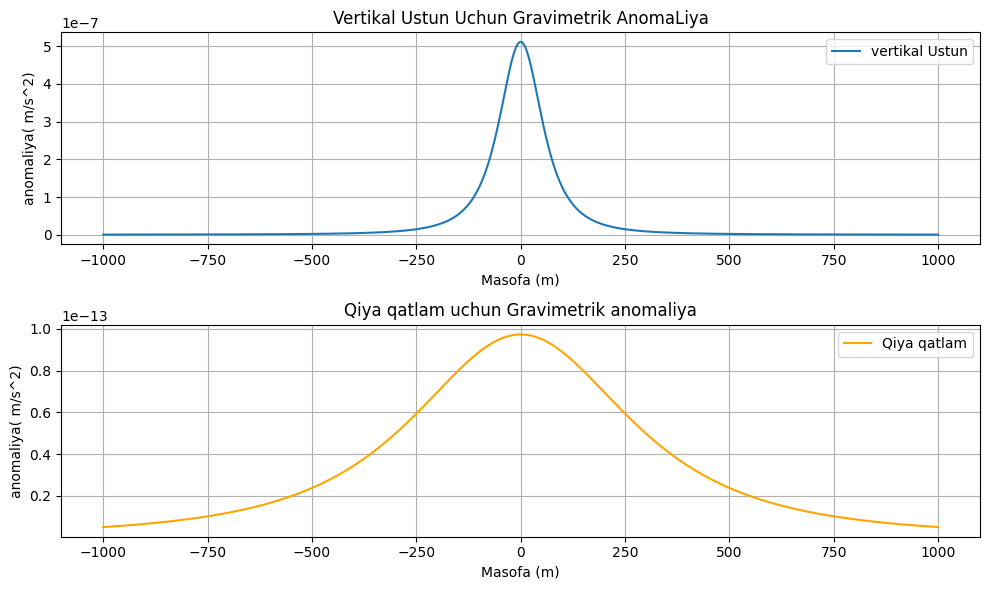

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Gravitatsion doimiysi
G = 6.67430e-11 # m^3 kg^-1 s^2

# 1 vertikal ustun uchun gravimetrik anomaliya 
def grav_anomaly_vertical_column(density, radius, height, depth, x):
  """
  Vertikal ustun uchun gravimetrik anomaliyani hisoblash
  density: Ustunning zichligi (kg/m^3)
  radius: Ustunning radiusi (m)
  height: Ustunning balandligi (m)
  depth: Ustunning chuqurligi (m)
  x: Gorizontal masofa (m)
  """
  anomaly = (2 * np.pi * G * density * radius**2 * height) / (depth**2 + x**2)**1.5
  return anomaly
    
# 2. qiya qatlam uchun gravimetrik anomalia
def grav_anomaly_inclined_layer(density,thickness, depth,angle, x):
  """
  Qiya qatlam uchun gravimetrik anomaliyani hisoblash
  density: Qatlamning zichligi (kg/m^3)
  thickness: Qatlamning qalinligi (m)
  depth: Qatlamning chuqurligi (m)
  angle: Qatlamning qiyalik burchagi (gradusda)
  x: Gorizontal Masofa (m)
  """
  rad_angle = np.radians(angle)
  anomaly = (2 * G * density * thickness * np.sin(rad_angle)) / (depth**2 + x**2)**1.5
  return anomaly
    
#Parametrlarni belgilash 
density_column = 2500 # kg/m^3
radius_column = 50 # m
height_column = 100  # m
depth_column = 80 # m
density_layer = 2200 # kg/m^3
thickness_layer = 30 # m
depth_layer = 400 # m
angle_layer = 45 # gradus

x = np.linspace(-1000, 1000, 500) # Gorizontal masofalar

# anomaliyalarni hisoblash
anomaly_vertical_column = grav_anomaly_vertical_column(density_column, radius_column, height_column, depth_column, x)
anomaly_inclined_layer = grav_anomaly_inclined_layer(density_layer, thickness_layer, depth_layer, angle_layer, x)

# Grafik chizish
plt.figure(figsize=(10, 6))

# vertikal ustun
plt.subplot(2, 1, 1)
plt.plot(x, anomaly_vertical_column, label="vertikal Ustun")
plt.title("Vertikal Ustun Uchun Gravimetrik AnomaLiya")
plt.xlabel("Masofa (m)")
plt.ylabel("anomaliya( m/s^2)")
plt.grid(True)
plt.legend()
# qiya qatlam uchun 

plt.subplot(2, 1, 2)
plt.plot(x, anomaly_inclined_layer, label = "Qiya qatlam", color ="orange")
plt.title("Qiya qatlam uchun Gravimetrik anomaliya")
plt.xlabel("Masofa (m)")
plt.ylabel("anomaliya( m/s^2)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



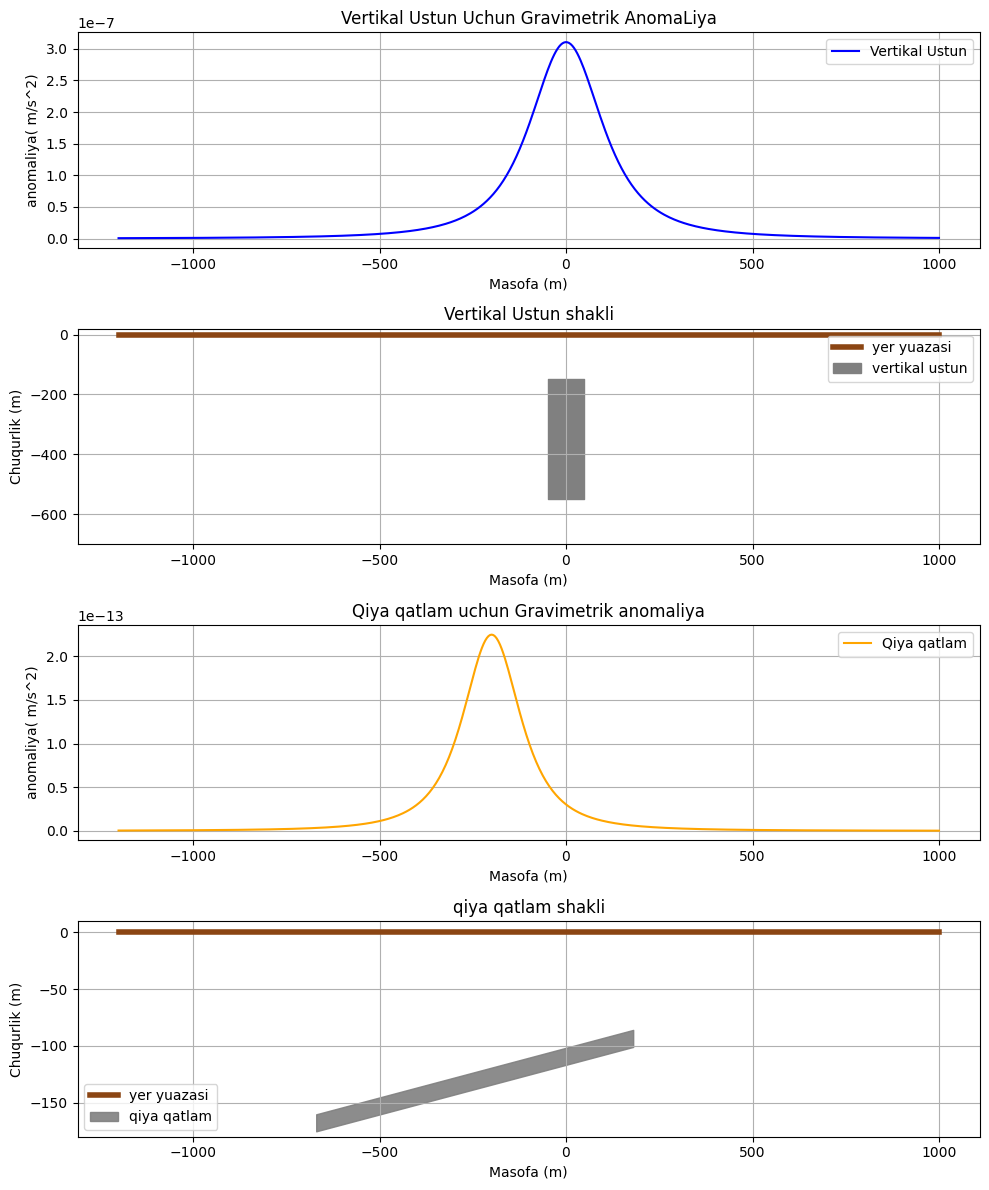

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Gravitatsion doimiysi
G = 6.67430e-11 # m^3 kg^-1 s^2

# 1 vertikal ustun uchun gravimetrik anomaliya 
def grav_anomaly_vertical_column(density, radius, height, depth, x):
  """
  Vertikal ustun uchun gravimetrik anomaliyani hisoblash
  density: Ustunning zichligi (kg/m^3)
  radius: Ustunning radiusi (m)
  height: Ustunning balandligi (m)
  depth: Ustunning chuqurligi (m)
  x: Gorizontal masofa (m)
  """
  anomaly = (2 * np.pi * G * density * radius**2 * height) / (depth**2 + x**2)**1.5
  return anomaly
    
# 2. qiya qatlam uchun gravimetrik anomalia
def grav_anomaly_inclined_layer(density,thickness, depth,angle, x):
  """
  Qiya qatlam uchun gravimetrik anomaliyani hisoblash
  density: Qatlamning zichligi (kg/m^3)
  thickness: Qatlamning qalinligi (m)
  depth: Qatlamning chuqurligi (m)
  angle: Qatlamning qiyalik burchagi (gradusda)
  x: Gorizontal Masofa (m)
  x_layer-center: Qiya qartlam markazining gorizontal joylashuvi
  """
  rad_angle = np.radians(angle)
    
# Qatlam markaziga nisbatan gravimetrik anomaliya hisoblanadi
  anomaly = (2 * G * density * thickness * np.sin(rad_angle)) / ((depth + np.tan(rad_angle)*(x - x_layer_center))**2 + (x - x_layer_center)**2)**1.5
  return anomaly
    
# Parametrlarni belgilash
density_column = 2500 # kg/m^3
radius_column = 50 # m
height_column = 400  # m
depth_column = 150 # m # yer yuzasidan chuqurroq belgilash

density_layer = 2200 # kg/m^3
thickness_layer = 15 # m
depth_layer = -120 # m # Qatlam chuqurligini oshirish
angle_layer = 5 # gradus
x_layer_center = -210 # qiya qatlam markazining gorizontal joylashuvi

x = np.linspace(-1200, 1000, 500) # Gorizontal masofalar

# anomaliyalarni hisoblash
anomaly_vertical_column = grav_anomaly_vertical_column(density_column, radius_column, height_column, depth_column, x)
anomaly_inclined_layer = grav_anomaly_inclined_layer(density_layer, thickness_layer, depth_layer, angle_layer, x)

# Grafik chizish
plt.figure(figsize=(10, 12))

# vertikal ustun
plt.subplot(4, 1, 1)
plt.plot(x, anomaly_vertical_column, label="Vertikal Ustun", color="blue")
plt.title("Vertikal Ustun Uchun Gravimetrik AnomaLiya")
plt.xlabel("Masofa (m)")
plt.ylabel("anomaliya( m/s^2)")
plt.grid(True)
plt.legend()

# vertikal ustunni shakli
plt.subplot(4, 1, 2)
plt.plot(x, np.zeros_like(x), color='saddlebrown', linewidth=4, label="yer yuazasi")
plt.fill_between(x[(x >= -radius_column) & (x <= radius_column)], -height_column-depth_column,-depth_column, color='gray', label="vertikal ustun")
plt.ylim(-depth_column-550, 20)
plt.title("Vertikal Ustun shakli")
plt.xlabel("Masofa (m)")
plt.ylabel("Chuqurlik (m)")
plt.grid(True)
plt.legend()

# qiya qatlam uchun anomaliya
plt.subplot(4, 1, 3)
plt.plot(x, anomaly_inclined_layer, label = "Qiya qatlam", color ="orange")
plt.title("Qiya qatlam uchun Gravimetrik anomaliya")
plt.xlabel("Masofa (m)")
plt.ylabel("anomaliya( m/s^2)")
plt.grid(True)
plt.legend()

# qiya qatlam shakli
plt.subplot(4, 1, 4)
plt.plot(x, np.zeros_like(x), color='saddlebrown', linewidth=4, label="yer yuazasi")

# qiya qatlamning chuqurlik bilan hisoblash
x_layer = np.linspace(-800, 50, 500) + 130 # Qiya qatlam 55 metr o'ngga surish
z_layer_top = depth_layer + np.tan(np.radians(angle_layer)) * (x_layer - x_layer_center)
z_layer_bottom = z_layer_top - thickness_layer
plt.fill_between(x_layer, z_layer_bottom, z_layer_top, color='gray', alpha=0.9, label="qiya qatlam")
plt.ylim(-depth_layer-300, 10)
plt.title("qiya qatlam shakli")
plt.xlabel("Masofa (m)")
plt.ylabel("Chuqurlik (m)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


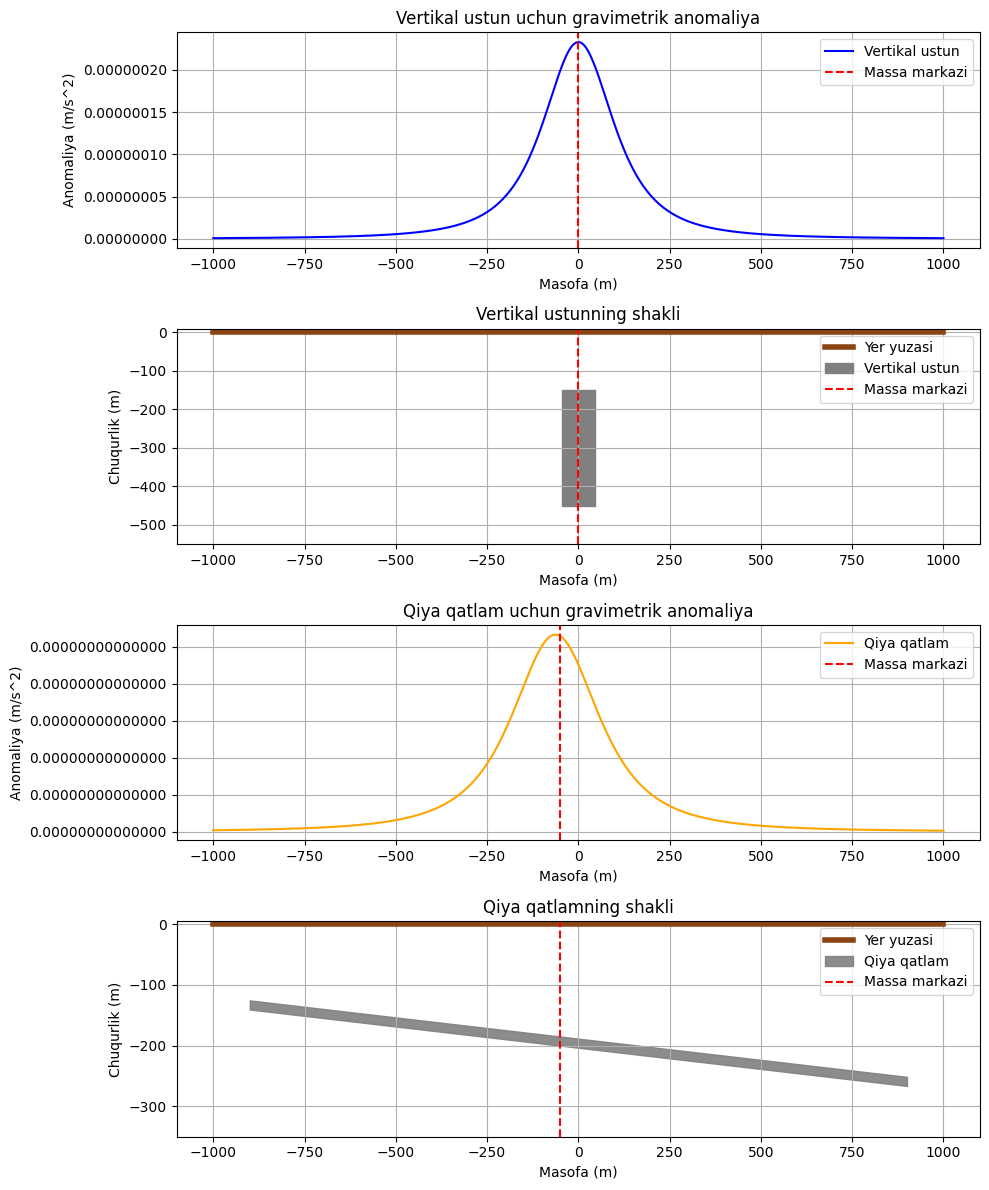

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Gravitatsion doimiysi
G = 6.67430e-11  # m^3 kg^-1 s^2

# Gravimetrik anomaliya hisoblash formulalari
def grav_anomaly_vertical_column(density, radius, height, depth, x):
    anomaly = (2 * np.pi * G * density * radius**2 * height) / (depth**2 + x**2)**1.5
    return anomaly

def grav_anomaly_inclined_layer(density, thickness, depth, angle, x, center_x):
    rad_angle = np.radians(angle)
    relative_x = x - center_x
    z_eff = depth + thickness - np.tan(rad_angle) * relative_x
    anomaly = (2 * G * density * thickness * np.sin(rad_angle)) / (z_eff**2 + relative_x**2)**1.5
    return anomaly

# Parametrlar
density_column = 2500  # kg/m^3
radius_column = 50  # m
height_column = 300  # m
depth_column = 150  # m

density_layer = 2400  # kg/m^3
thickness_layer = 15  # m
depth_layer = -200  # m
angle_layer = 4  # gradus
center_x_layer = -50  # Qiya qatlam markazi

# gorizontal masofani aniqlash
x = np.linspace(-1000, 1000, 500)

# Anomaliyalarni hisoblash
anomaly_vertical_column = grav_anomaly_vertical_column(density_column, radius_column, height_column, depth_column, x)
anomaly_inclined_layer = grav_anomaly_inclined_layer(density_layer, thickness_layer, depth_layer, angle_layer, x, center_x_layer)

#grafik
plt.figure(figsize=(10, 12))


# Vertikal ustun uchun gravimetrik anomaliya
plt.subplot(4, 1, 1)
plt.plot(x, anomaly_vertical_column, label="Vertikal ustun", color="blue")
plt.axvline(x=0, color='red', linestyle='--', label='Massa markazi')
plt.title("Vertikal ustun uchun gravimetrik anomaliya")
plt.xlabel("Masofa (m)")
plt.ylabel("Anomaliya (m/s^2)")
axs[0].set_ylim(0, 1e-6) # y o'qi uchun cheklov
plt.grid(True)
plt.legend()

# Y O'qi qiymatini oddiy ko'rinishda ko'rsatish
plt.ticklabel_format(style='plain', axis='y')
                     
# Vertikal ustunning shakli
plt.subplot(4, 1, 2)
plt.plot(x, np.zeros_like(x), color='saddlebrown', linewidth=4, label="Yer yuzasi")
plt.fill_between(x[(x >= -radius_column) & (x <= radius_column)], -height_column-depth_column, -depth_column, color='gray', label="Vertikal ustun")
plt.axvline(x=0, color='red', linestyle='--', label='Massa markazi')
plt.ylim(-depth_column-400, 10)
plt.title("Vertikal ustunning shakli")
plt.xlabel("Masofa (m)")
plt.ylabel("Chuqurlik (m)")
plt.grid(True)
plt.legend()

# Qiya qatlam uchun gravimetrik anomaliya
plt.subplot(4, 1, 3)
plt.plot(x, anomaly_inclined_layer, label="Qiya qatlam", color="orange")
plt.axvline(x=center_x_layer, color='red', linestyle='--', label='Massa markazi')
plt.title("Qiya qatlam uchun gravimetrik anomaliya")
plt.xlabel("Masofa (m)")
plt.ylabel("Anomaliya (m/s^2)")
axs[0].set_ylim(0, 1e-6) # y o'qi uchun cheklov
plt.grid(True)
plt.legend()

# Y O'qi qiymatini oddiy ko'rinishda ko'rsatish
plt.ticklabel_format(style='plain', axis='y')

 # Qiya qatlamning shakli
plt.subplot(4, 1, 4)
plt.plot(x, np.zeros_like(x), color='saddlebrown', linewidth=4, label="Yer yuzasi")
x_layer = np.linspace(-900, 900, 500)
z_layer_top = depth_layer + thickness_layer - np.tan(np.radians(angle_layer)) * (x_layer - center_x_layer)
z_layer_bottom = z_layer_top - thickness_layer
plt.fill_between(x_layer, z_layer_bottom, z_layer_top, color='gray', alpha=0.9, label="Qiya qatlam")
plt.axvline(x=center_x_layer, color='red', linestyle='--', label='Massa markazi')
plt.ylim(-350, 5)
plt.title("Qiya qatlamning shakli")
plt.xlabel("Masofa (m)")
plt.ylabel("Chuqurlik (m)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

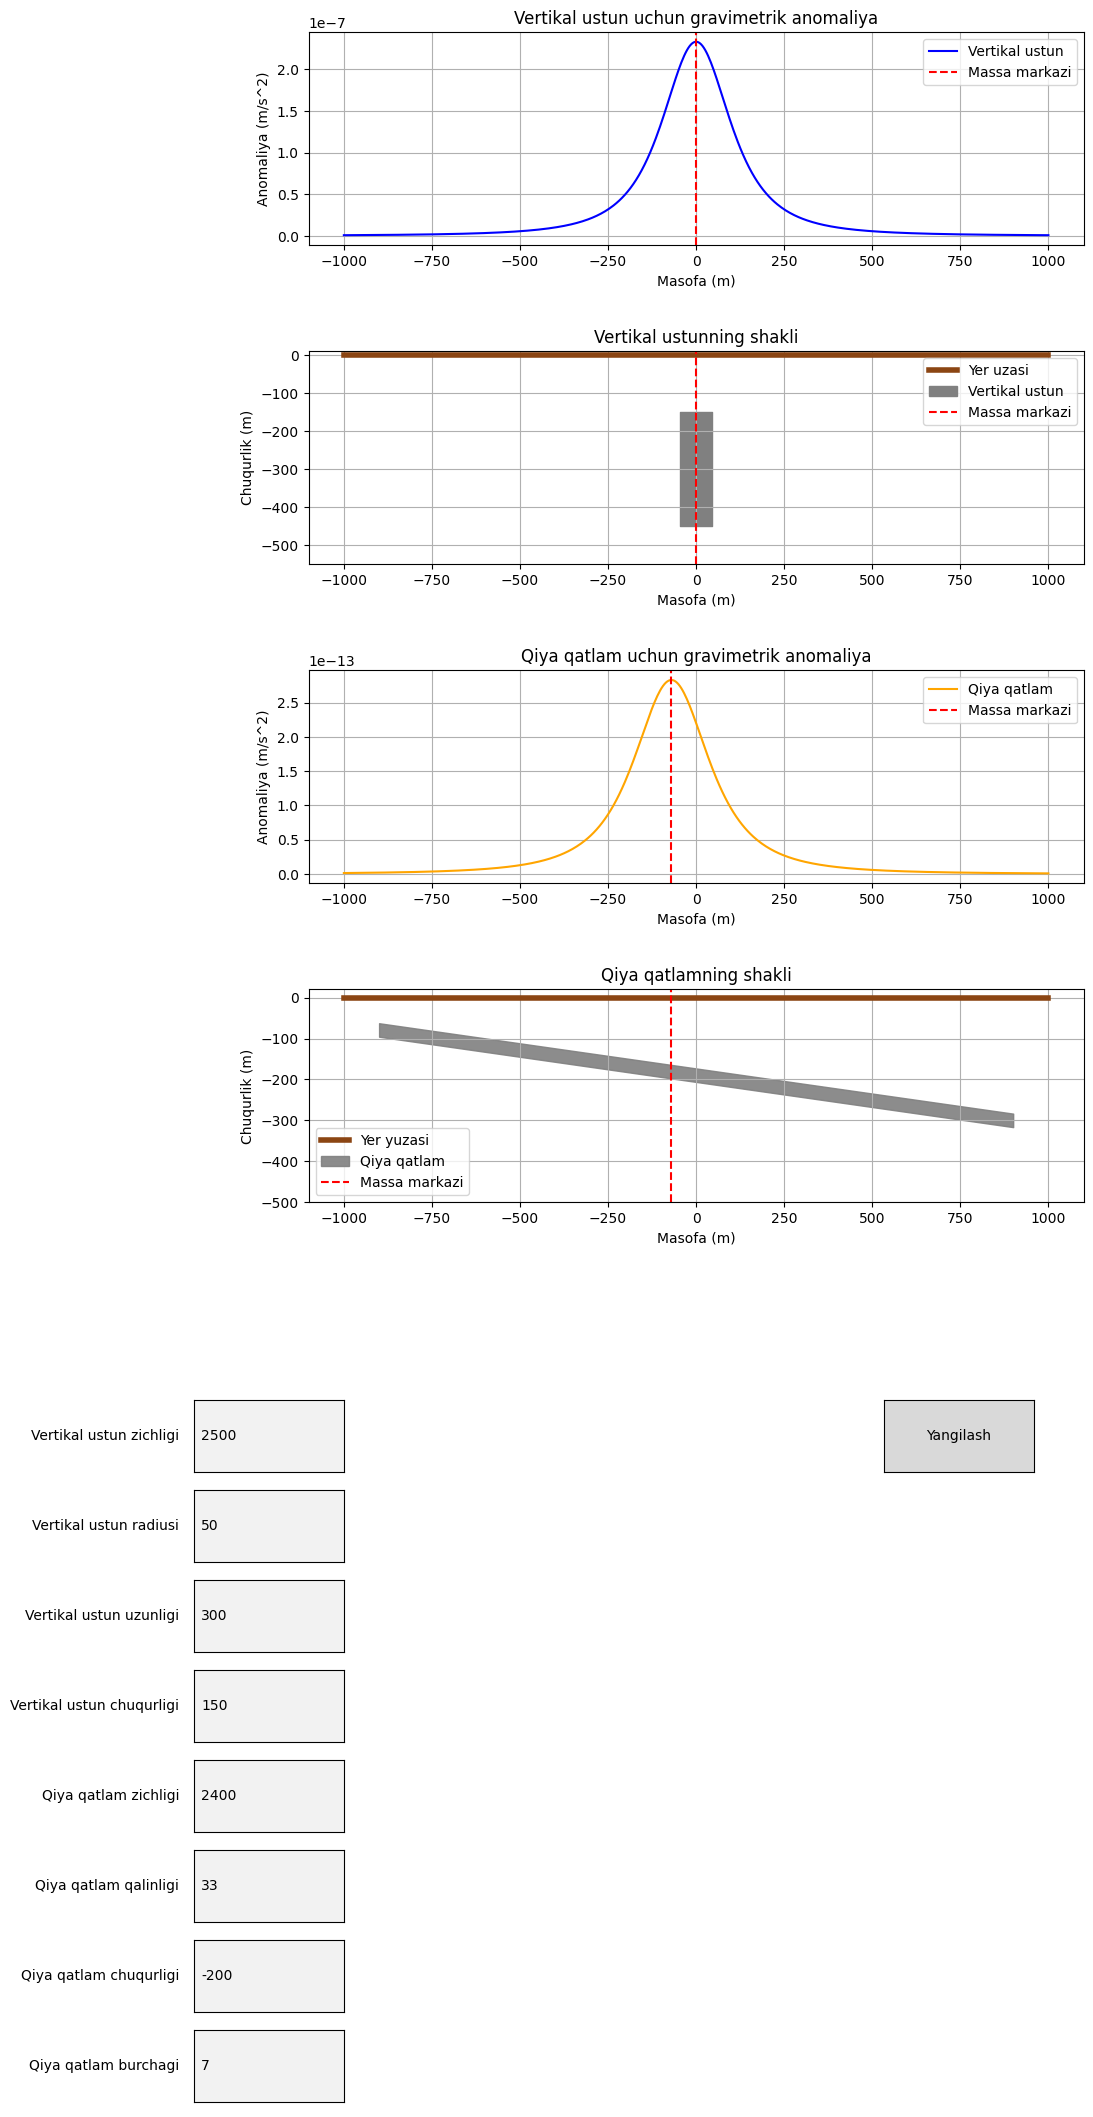

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, TextBox

# Gravitatsion doimiysi
G = 6.67430e-11  # m^3 kg^-1 s^2

# Gravimetrik anomaliya hisoblash formulalari
def grav_anomaly_vertical_column(density, radius, height, depth, x):
    anomaly = (2 * np.pi * G * density * radius**2 * height) / (depth**2 + x**2)**1.5
    return anomaly

def grav_anomaly_inclined_layer(density, thickness, depth, angle, x, center_x):
    rad_angle = np.radians(angle)
    relative_x = x - center_x
    z_eff = depth + thickness - np.tan(rad_angle) * relative_x
    anomaly = (2 * G * density * thickness * np.sin(rad_angle)) / (z_eff**2 + relative_x**2)**1.5
    return anomaly

# Parametrlar
density_column = 2500  # kg/m^3
radius_column = 50  # m
height_column = 300  # m
depth_column = 150  # m

density_layer = 2400  # kg/m^3
thickness_layer = 33  # m
depth_layer = -200  # m
angle_layer = 7  # gradus
center_x_layer = -50  # Qiya qatlam markazi

# Grafik chizish
fig, axs = plt.subplots(4, 1, figsize=(10, 18))

def update_graph():
    x = np.linspace(-1000, 1000, 500)

    # Anomaliyalarni hisoblash
    anomaly_vertical_column = grav_anomaly_vertical_column(density_column, radius_column, height_column, depth_column, x)
    anomaly_inclined_layer = grav_anomaly_inclined_layer(density_layer, thickness_layer, depth_layer, angle_layer, x, center_x_layer)

    max_anomaly_index = np.argmax(anomaly_inclined_layer)
    max_anomaly_x = x[max_anomaly_index]

    # Vertikal ustun uchun gravimetrik anomaliya
    axs[0].cla()
    axs[0].plot(x, anomaly_vertical_column, label="Vertikal ustun", color="blue")
    axs[0].axvline(x=0, color='red', linestyle='--', label='Massa markazi')
    axs[0].set_title("Vertikal ustun uchun gravimetrik anomaliya")
    axs[0].set_xlabel("Masofa (m)")
    axs[0].set_ylabel("Anomaliya (m/s^2)")
    axs[0].grid(True)
    axs[0].legend()

    # Vertikal ustunning shakli
    axs[1].cla()
    axs[1].plot(x, np.zeros_like(x), color='saddlebrown', linewidth=4, label="Yer uzasi")
    axs[1].fill_between(x[(x >= -radius_column) & (x <= radius_column)], -height_column-depth_column, -depth_column, color='gray', label="Vertikal ustun")
    axs[1].axvline(x=0, color='red', linestyle='--', label='Massa markazi')
    axs[1].set_ylim(-depth_column-400, 10)
    axs[1].set_title("Vertikal ustunning shakli")
    axs[1].set_xlabel("Masofa (m)")
    axs[1].set_ylabel("Chuqurlik (m)")
    axs[1].grid(True)
    axs[1].legend()

    # Qiya qatlam uchun gravimetrik anomaliya
    axs[2].cla()
    axs[2].plot(x, anomaly_inclined_layer, label="Qiya qatlam", color="orange")
    axs[2].axvline(x=max_anomaly_x, color='red', linestyle='--', label='Massa markazi')
    axs[2].set_title("Qiya qatlam uchun gravimetrik anomaliya")
    axs[2].set_xlabel("Masofa (m)")
    axs[2].set_ylabel("Anomaliya (m/s^2)")
    axs[2].grid(True)
    axs[2].legend()

    # Qiya qatlamning shakli
    axs[3].cla()
    axs[3].plot(x, np.zeros_like(x), color='saddlebrown', linewidth=4, label="Yer yuzasi")
    x_layer = np.linspace(-900, 900, 500)
    z_layer_top = depth_layer + thickness_layer - np.tan(np.radians(angle_layer)) * (x_layer - center_x_layer)
    z_layer_bottom = z_layer_top - thickness_layer
    axs[3].fill_between(x_layer, z_layer_bottom, z_layer_top, color='gray', alpha=0.9, label="Qiya qatlam")
    axs[3].axvline(x=max_anomaly_x, color='red', linestyle='--', label='Massa markazi')
    axs[3].set_ylim(-500, 20)
    axs[3].set_title("Qiya qatlamning shakli")
    axs[3].set_xlabel("Masofa (m)")
    axs[3].set_ylabel("Chuqurlik (m)")
    axs[3].grid(True)
    axs[3].legend()

    plt.draw()  # faqat grafikni yangilash

# Grafikni chizish va oraliqlarni sozlash
plt.subplots_adjust( top=0.95, bottom=0.3, hspace=0.5)   # pastki qismda bo'sh joy yaratish va grafiklar orasidagi bo'shliqni oshirish 
update_graph()

# Parametrlarni kiritish uchun kataklar
density_col_box = TextBox(plt.axes([0.01, 0.15, 0.15, 0.04]), 'Vertikal ustun zichligi   ', initial=str(density_column))
radius_col_box = TextBox(plt.axes([0.01, 0.10, 0.15, 0.04]), 'Vertikal ustun radiusi   ', initial=str(radius_column))
height_col_box = TextBox(plt.axes([0.01, 0.05, 0.15, 0.04]), 'Vertikal ustun uzunligi   ', initial=str(height_column))
depth_col_box = TextBox(plt.axes([0.01, 0.00, 0.15, 0.04]), 'Vertikal ustun chuqurligi   ', initial=str(depth_column))

density_layer_box = TextBox(plt.axes([0.01, -0.05, 0.15, 0.04]), 'Qiya qatlam zichligi   ', initial=str(density_layer))
thickness_layer_box = TextBox(plt.axes([0.01, -0.10, 0.15, 0.04]), 'Qiya qatlam qalinligi   ', initial=str(thickness_layer))
depth_layer_box = TextBox(plt.axes([0.01, -0.15, 0.15, 0.04]), 'Qiya qatlam chuqurligi   ', initial=str(depth_layer))
angle_layer_box = TextBox(plt.axes([0.01, -0.20, 0.15, 0.04]), 'Qiya qatlam burchagi   ', initial=str(angle_layer))

# Yangilash tugmasi
def update_params(event):
    global density_column, density_layer, thickness_layer, angle_layer, radius_column, height_column, depth_column, depth_layer, center_x_layer
    density_column = float(density_col_box.text)
    radius_column = float(radius_col_box.text)
    height_column = float(height_col_box.text)
    depth_column = float(depth_col_box.text)
       
    density_layer = float(density_layer_box.text)
    thickness_layer = float(thickness_layer_box.text)
    depth_layer = float(depth_layer_box.text)
    angle_layer = float(angle_layer_box.text)
    update_graph()

update_button = Button(plt.axes([0.7, 0.15, 0.15, 0.04]), 'Yangilash')
update_button.on_clicked(update_params)

# Grafikni Chizish
plt.show()
